### TELOC customer churn Prediction

#### Using Kaggle Telcom customer churn dataset

####  I will be research the dataset with CRIP-DM process

#### 1. Bussiness & Data Understanding

##### **Why Customer move away to competitor is key question of any telecom operator** The purpose to identify the petential customer who could leave and do a proactive marketing offer to try to retain the customer moving to competitor.

##### The dataset has 7043 customer observations with 21 features. The Churn column has a YES no value which indicate if the customer have left the services of the telecom company in with in last 1 month

##### With the customer data for Kaggle.com I would like to answer following questions

> **1. What factor most influence the customer churn,  Here churn mean probaility of the 
customer leaving with in 1 month**

> **2. Classify the customer of who to poetntially churn or not**

> **3. What is the proability of customer to leave the telcom services of the company** 



In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


######  This seams to be perfect dataset with no missing values .  But ther are number of category object columns which will have to substitued for dummy variables

###### Let us under stand the each object column has distinct and meaning ful catergories. Otherwise the data in these features have to made as unique categories

###### 2. Data Wraningling 

In [5]:
def unique_val(df):
    '''
    INPUT: 
    df - pandas dataframe with categorical variables you want to find unique value.
        
    OUTPUT:
    print of Unique value of object columns
    
    
    '''
    
    for col in df.select_dtypes(include=['object']).columns.tolist():
        print('column {} has {} values which are {}'.
              format(col,df[col].nunique(),
                     df[col].unique())
             )
    
    return 0

In [6]:
#calling the function for except the customer ID
unique_val(df.iloc[:,1:])

column gender has 2 values which are ['Female' 'Male']
column Partner has 2 values which are ['Yes' 'No']
column Dependents has 2 values which are ['No' 'Yes']
column PhoneService has 2 values which are ['No' 'Yes']
column MultipleLines has 3 values which are ['No phone service' 'No' 'Yes']
column InternetService has 3 values which are ['DSL' 'Fiber optic' 'No']
column OnlineSecurity has 3 values which are ['No' 'Yes' 'No internet service']
column OnlineBackup has 3 values which are ['Yes' 'No' 'No internet service']
column DeviceProtection has 3 values which are ['No' 'Yes' 'No internet service']
column TechSupport has 3 values which are ['No' 'Yes' 'No internet service']
column StreamingTV has 3 values which are ['No' 'Yes' 'No internet service']
column StreamingMovies has 3 values which are ['No' 'Yes' 'No internet service']
column Contract has 3 values which are ['Month-to-month' 'One year' 'Two year']
column PaperlessBilling has 2 values which are ['Yes' 'No']
column PaymentMethod

0

###### The unqiue values are all fine but the total charges which is supposed to be float is represented as object.  This should be converted as float
There seems to be few instances of blanks which I will fill up with 0.0 and then convert float

In [7]:
for x in df['TotalCharges']:
    try: 
        float(x)
    except:
        print('Issue converting >>{}<<'.format(x))

Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<
Issue converting >> <<


In [8]:
# Replace the spaces with float 0.0 values
df['TotalCharges'].replace(' ','0.0',inplace=True)

In [9]:
for x in df['TotalCharges']:
    try: 
        float(x)
    except:
        print('Issue converting >>{}<<'.format(x))

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

###### 3. Data Modelling 

######  The data is in good shape, Let me explore to answering the questions. Distribution of  features with respect to churn will give us some idea of which features could contribute to churn.

In [12]:
def feature_count(df,cols,col_lst):
    '''
    function to plot induvidual count plots into tiles
    INPUT:
    df -  Pandas dataframe to create plot
    cols - number of columns to arrage the plots
    col_lst -  the list of column from dataframe to arrage into plots
    
    OUTPUT:
    seaborn count plot of each column from the column list grouped by churn 
    '''
    
    num_rows = round((len(col_lst)/cols))
    f,axes = plt.subplots(num_rows, cols, figsize=(num_rows * 5, cols * 4) )
    print('number of rows {}'.format(num_rows))
    i,j = 0,0
    
    for col in col_lst:
        g = sns.countplot(data=df, 
                          x=col,
                          hue='Churn',
                          ax=axes[i,j]);
        for p in g.patches:
            g.annotate(format(p.get_height()),
                             (p.get_x() + p.get_width() / 2.,
                              p.get_height()
                             ), 
                             ha = 'center',
                             va = 'center',
                             xytext = (0, 10),
                             textcoords = 'offset points'
                      )
        j+=1 
        
        if j == num_rows: 
            i += 1;
            j = 0;
                
    return 0

number of rows 4


0

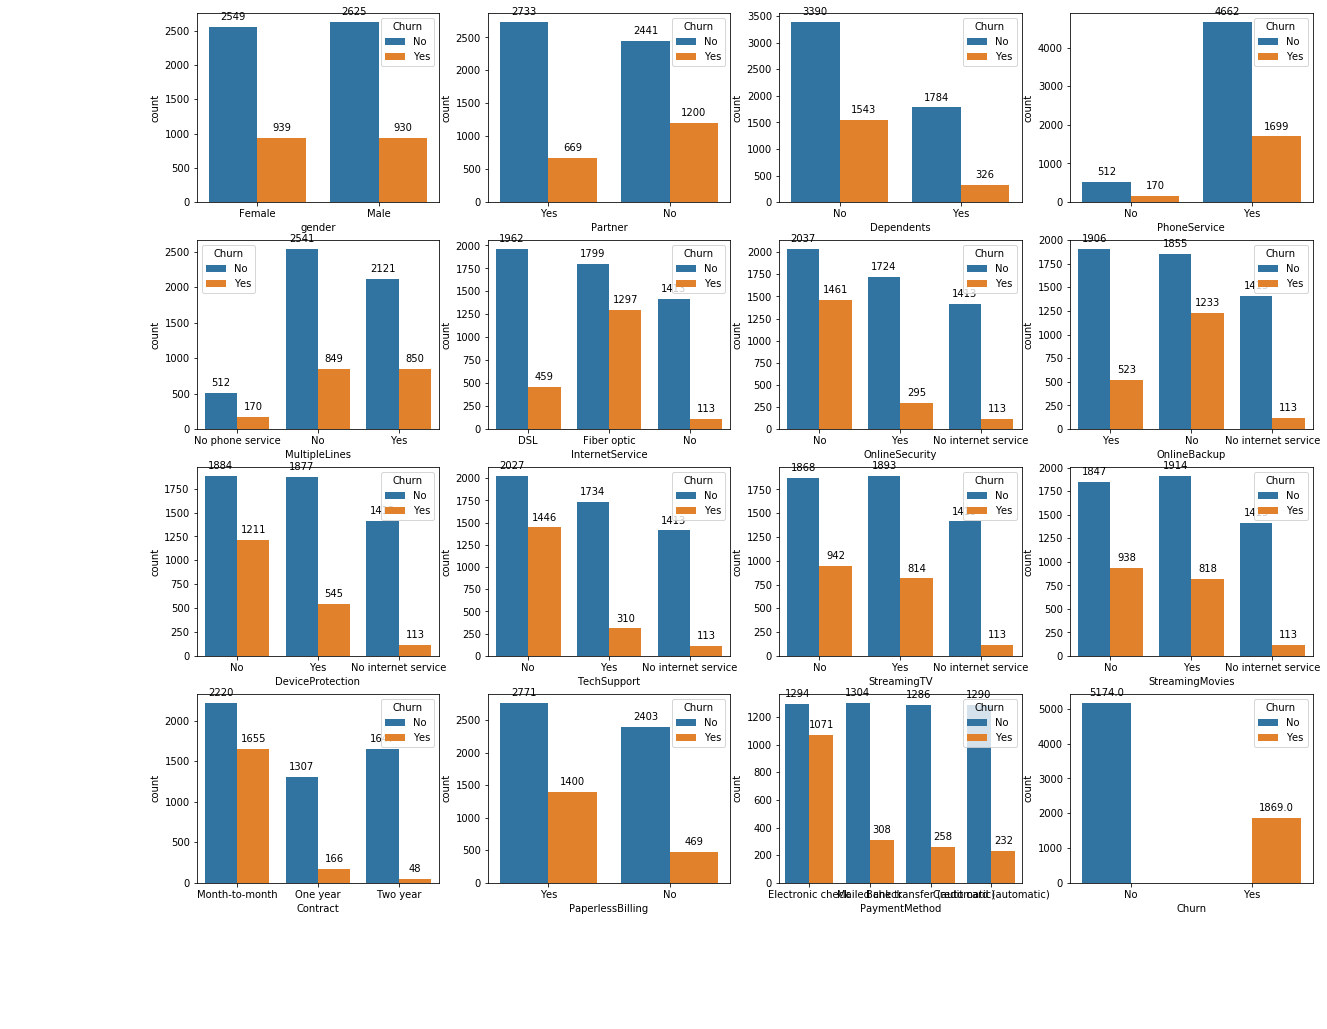

In [13]:
col_lst = df.select_dtypes(include=['object']).columns[1:].tolist()

feature_count(df, 4, col_lst)

###### I could see that compartively high level of Churn with 
> * Customers using fiberoptics
> * Customers with no online Security enrolled
> * Customers with no Online backup service enrolled
> * customers with no device protuction enrolled
> * customers with no Tech support enrolled
> * customer who pay month on month
> * Cusotmer who have electronic billing enrolled
##### This could indicate more services the customers use more likely they are going to stay.  Let us see how the combination of all this factors contribute to the over all Churn percentage.

In [14]:
major_churn = df.query('(InternetService == "Fiber optic"   \
                         | OnlineSecurity == "No"           \
                         | OnlineBackup == "No"             \
                         | DeviceProtection == "No"         \
                         | TechSupport == "No"              \
                         | Contract == "Month-to-month"     \
                         | PaymentMethod == "Electronic check"  \
                        ) & Churn == "Yes" ')['Churn'].count()

total_churn = df.query('Churn == "Yes"')['Churn'].count()

print("Churn by major cause {}".format(major_churn))
print("Total Churn {}".format(total_churn))

print("Pecentage of Churn by major cause out of total churn {:.2f}%".
      format(major_churn/total_churn*100))

Churn by major cause 1851
Total Churn 1869
Pecentage of Churn by major cause out of total churn 99.04%


##### Let me create some plot to understand the other numerical variables

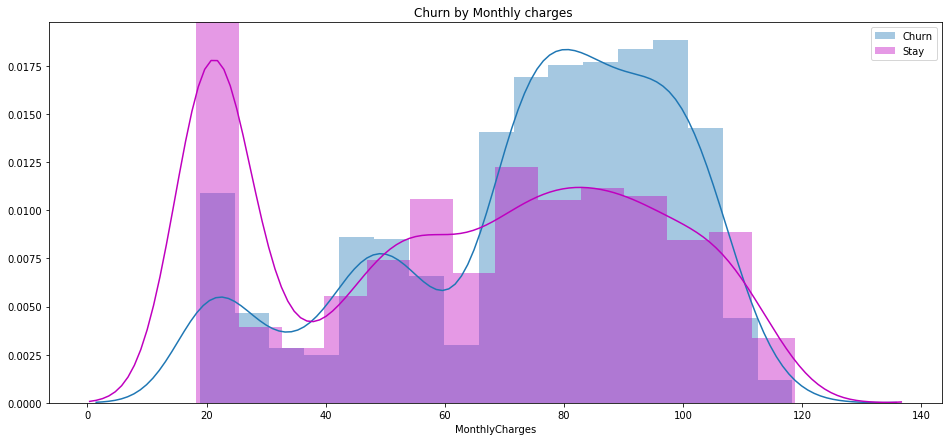

In [15]:
fig, ax = plt.subplots(figsize=(16,7))

sns.distplot(df.query('Churn == "Yes"')['MonthlyCharges'], label ='Churn')
sns.distplot(df.query('Churn == "No"')['MonthlyCharges'],color='m', label = 'Stay')
plt.title('Churn by Monthly charges ')
plt.legend()

##### There seems to be more churn in the range of $70 to $110 per month. Let us check for TotalCharges. 

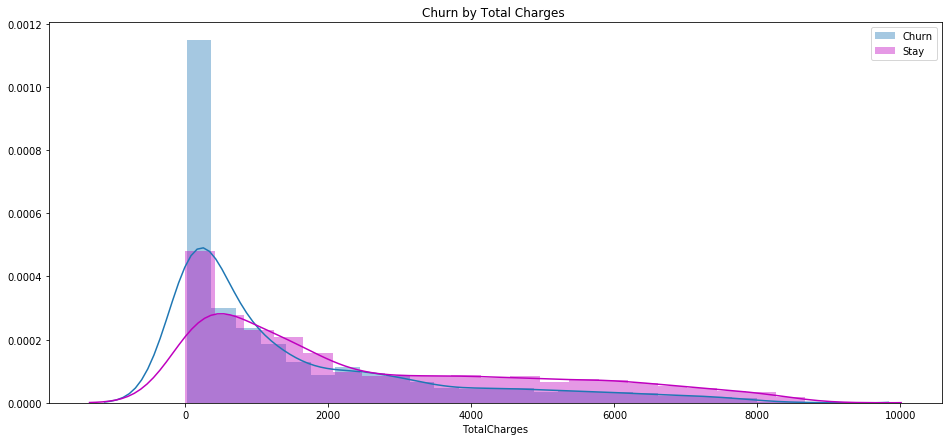

In [16]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(df.query('Churn == "Yes"')['TotalCharges'],
             label ='Churn'
            )
sns.distplot(df.query('Churn == "No"')['TotalCharges'],
             color='m',
             label = 'Stay'
            )

plt.title('Churn by Total Charges ')
plt.legend()

###### Interestingly the is more Churn in lower total Charge, which could indicate more customers are leaving early before spending much with the Telco operator.  We could get better Idea when we check the tenure

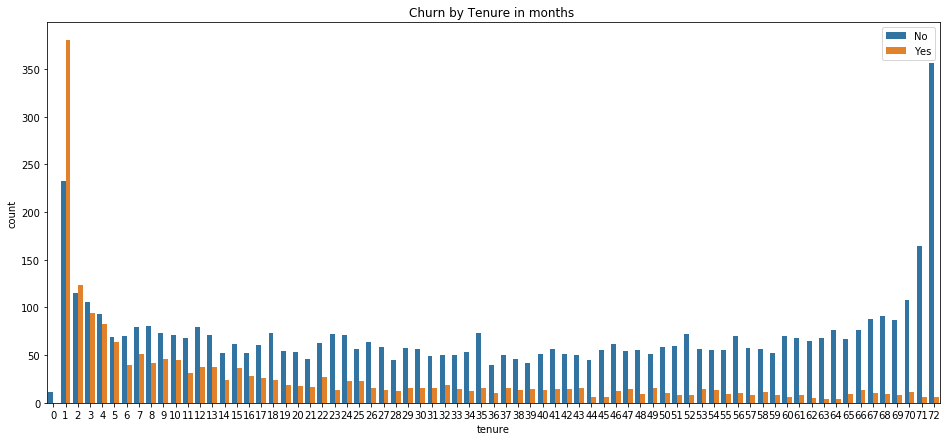

In [17]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(df['tenure'], 
              hue=df['Churn'])

plt.title('Churn by Tenure in months ')
plt.legend()

###### The plot shows the there are high chances of customer leaving before month 15. the long the cusotmer stays less likely he/she will leave the services.

###### Let me move on to Classification of customer who could have high probality to churn.

###### Base Model is smiple logistic regression with numeric encoding of feature, another models will be logistic regression after dummy variable substitution.

In [18]:
## Function to numeric encoding of features for Logistic regression
from sklearn.preprocessing import LabelEncoder

df_enc = df.copy()
## filter categorical columns using mask and turn it into a list

categorical_feature_mask = df_enc.dtypes==object 
categorical_cols = df_enc.columns[categorical_feature_mask].tolist()[1:]

# categorical_cols
le = LabelEncoder()

df_enc[categorical_cols] = df_enc[categorical_cols].                     \
                           apply(lambda col: le.fit_transform(col))

df_enc[categorical_cols].head(10)

df_enc['customerID'] = df['customerID']

In [19]:
df_enc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


#### Now the data is ready for Logistic Regression 

###### 4. Predicting 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
# Split data into train and test data

(x_train, x_test, y_train, y_test) = train_test_split(df_enc.iloc[:,1:-1],
                                                      df_enc.iloc[:,-1],
                                                      test_size = .30,
                                                      random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930, 19)
(4930,)
(2113, 19)
(2113,)


In [22]:
# Logistic Regression fit

logit  = LogisticRegression(C=1.0,
                            class_weight=None,
                            dual=False, 
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2', 
                            random_state=42,
                            solver='liblinear', 
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

# train model
logit.fit(x_train,y_train)

predictions   = logit.predict(x_test)
probabilities = logit.predict_proba(x_test)

#coeffs
coefficients  = pd.DataFrame(logit.coef_.ravel())

In [23]:
probabilities

array([[ 0.3957838 ,  0.6042162 ],
       [ 0.93791876,  0.06208124],
       [ 0.99541311,  0.00458689],
       ..., 
       [ 0.99149561,  0.00850439],
       [ 0.42587605,  0.57412395],
       [ 0.79028687,  0.20971313]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Classification report : 
              precision    recall  f1-score   support

          0       0.85      0.90      0.87      1539
          1       0.67      0.56      0.61       574

avg / total       0.80      0.81      0.80      2113

Accuracy   Score :  0.805016564127
Area under curve :  0.727959804661 



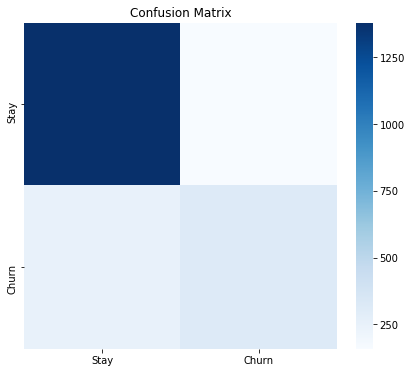

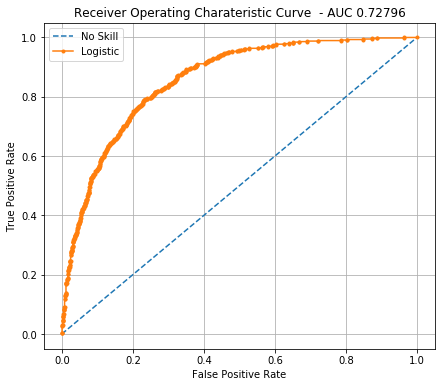

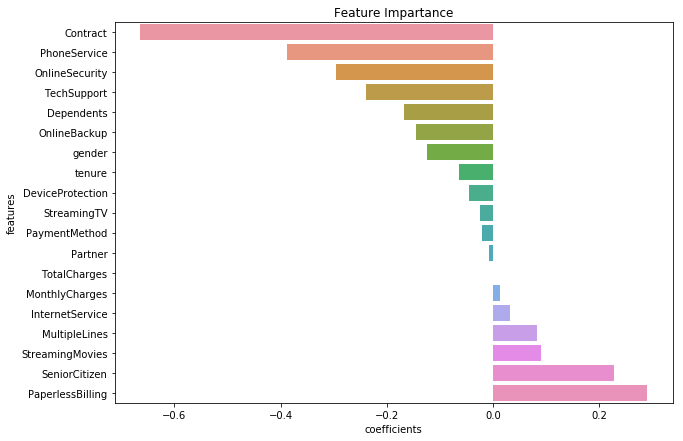

0.805016564127 0.727959804661


In [24]:
column_df     = pd.DataFrame(df_enc.iloc[:,1:-1].columns.tolist())

coef_sumry    = pd.merge(coefficients,
                         column_df,
                         left_index= True,
                         right_index= True,
                         how = "left"
                        )
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients",
                                    ascending = False
                                   )
    
print (logit)
print ("\nClassification report : \n",
       classification_report(y_test,
                             predictions)
      )
print ("Accuracy   Score : ",accuracy_score(y_test,
                                            predictions)
      )

logit_score = accuracy_score(y_test, predictions)

#confusion matrix
conf_matrix = confusion_matrix(y_test,
                               predictions
                              )
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,predictions)
print ("Area under curve : ",
       model_roc_auc,
       "\n"
      )

logit_roc = roc_auc_score(y_test,predictions)

fpr,tpr,thresholds = roc_curve(y_test,
                               probabilities[:,1])


#plot confusion matrix
fig, ax = plt.subplots(figsize=(7,6))
trace1 = sns.heatmap(data = conf_matrix ,
                        xticklabels = ["Stay","Churn"],
                        yticklabels = ["Stay","Churn"],
                        cmap = "Blues"
                    )
plt.title('Confusion Matrix');
plt.show()

# plot the ROC curve for the model
fig, ax = plt.subplots(figsize=(7,6))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(b=True)
plt.title('Receiver Operating Charateristic Curve  - AUC {:.5f}'.  \
          format(model_roc_auc)
         )
plt.legend()
plt.show()

# Feature Impartance
feature_impartant = coef_sumry.sort_values(by='coefficients')

fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=feature_impartant['coefficients'],
            y=feature_impartant['features'], 
            orient="h"
           )
plt.title('Feature Impartance')
plt.show()

print(logit_score, logit_roc)

###### Logistic regression with dummy variables of feature. 

In [25]:
# Change the seniorcitizens columns to string type 
# column to include in dummy variable conversion
df_prep = df.copy()

df_prep['SeniorCitizen'] = df_prep['SeniorCitizen'].astype('object')

In [26]:
catergory_columns = df_prep.select_dtypes(include=['object']).columns.tolist()

# remove Unnessary column for dummy variable
catergory_columns.remove('customerID')

# remove target columns from dummy variable replacement
catergory_columns.remove('Churn')      
catergory_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [27]:
def get_dummy_features(df, column_list):
    
    '''
    Input :  
    df - Pandas Dataframe whose columns will be replaced with dummy variables columns
    column_list - List of columns which have to replaced with dummy variables
    
    Output :
    df_dummy - pandas dataframe. catergory columns replaced with dummy variable columns
    '''
    df_dummy = df.copy()
    
    for column in column_list:
        df_dummy = pd.merge(df_dummy.drop([column],axis=1),
                            pd.get_dummies(df_dummy, columns=[column])
                           )
        
    return df_dummy

In [28]:
# Replace category columns of churn datasets with dummy dataset
df_dummy = get_dummy_features(df_prep,
                              catergory_columns
                             )                             
df_dummy.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [29]:
#change Churn column to numeric endoding before log regression
df_dummy['Churn'] = df_enc['Churn']
df_dummy.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [30]:
Feature_columns = [col for col in df_dummy.columns.tolist() if col not in ['Churn','customerID']  ]
# Feature_columns
Feature_columns

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'P

In [31]:
#target column
df_dummy['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
# Split data into train and test data of dummy variable dataset

(x_train, x_test, y_train, y_test) = train_test_split(df_dummy[Feature_columns],
                                                      df_dummy['Churn'],
                                                      test_size = .30,
                                                      random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930, 46)
(4930,)
(2113, 46)
(2113,)


In [33]:
# Logistic Regression fit with Dummy column dataset

logit_dummy  = LogisticRegression(C=1.0,
                            class_weight=None,
                            dual=False, 
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2', 
                            random_state=42,
                            solver='liblinear', 
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

# train model
logit_dummy.fit(x_train,y_train)

predictions   = logit_dummy.predict(x_test)
probabilities = logit_dummy.predict_proba(x_test)

#coeffs
coefficients  = pd.DataFrame(logit_dummy.coef_.ravel())

In [34]:
column_df  = pd.DataFrame(Feature_columns)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Classification report for dataset with Dummy variable replacement: 
              precision    recall  f1-score   support

          0       0.85      0.90      0.87      1539
          1       0.68      0.57      0.62       574

avg / total       0.80      0.81      0.81      2113

Accuracy   Score :  0.811168954094
Area under curve :  0.737099071074 



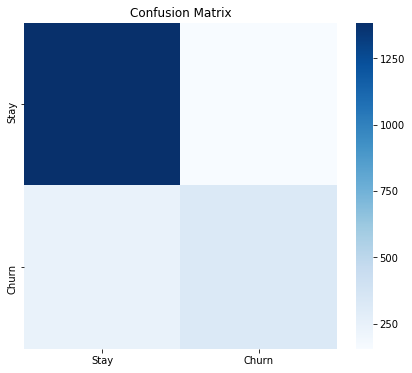

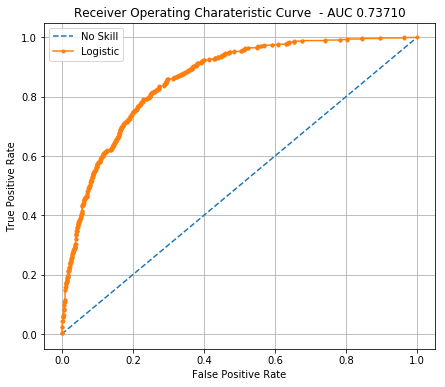

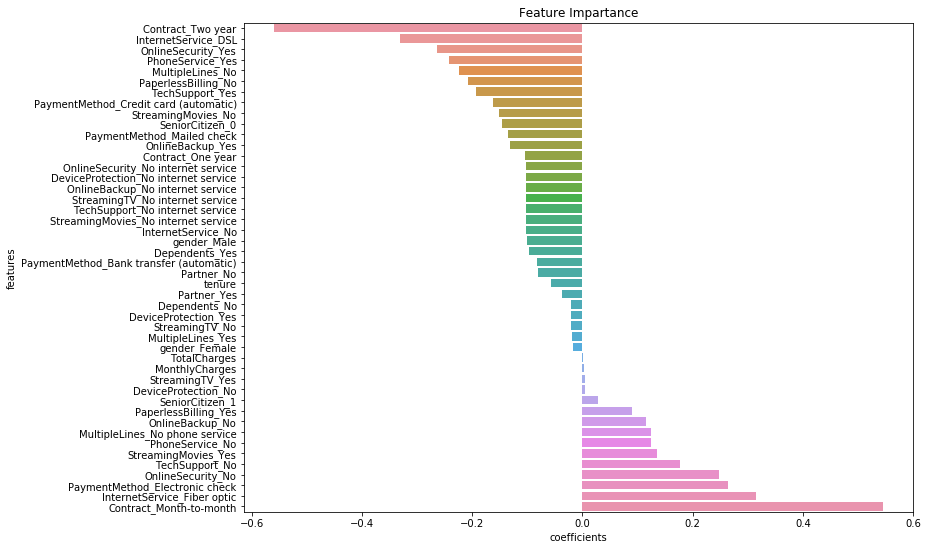

0.811168954094 0.737099071074


In [35]:
# Printing and ploting the metrics

coef_sumry    = pd.merge(coefficients,
                         column_df,
                         left_index= True,
                         right_index= True,
                         how = "left"
                        )
coef_sumry.columns = ["coefficients","features"]
coef_sumry         = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
print (logit_dummy)
print ("\nClassification report for dataset with Dummy variable replacement: \n",
       classification_report(y_test,
                             predictions)
      )
print ("Accuracy   Score : ",accuracy_score(y_test,
                                            predictions)
      )

logit_dummy_score = accuracy_score(y_test,predictions)

#confusion matrix
conf_matrix = confusion_matrix(y_test,
                               predictions
                              )
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,predictions)
print ("Area under curve : ",
       model_roc_auc,
       "\n"
      )

logit_dummy_roc = roc_auc_score(y_test,predictions)

fpr,tpr,thresholds = roc_curve(y_test,
                               probabilities[:,1])


#plot confusion matrix
fig, ax = plt.subplots(figsize=(7,6))
trace1 = sns.heatmap(data = conf_matrix ,
                     xticklabels = ["Stay","Churn"],
                     yticklabels = ["Stay","Churn"],
                     cmap = "Blues"
                    )
plt.title('Confusion Matrix');
plt.show()

# plot the ROC curve for the model
fig, ax = plt.subplots(figsize=(7,6))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(b=True)
plt.title('Receiver Operating Charateristic Curve  - AUC {:.5f}'. \
          format(model_roc_auc))
plt.legend()
plt.show()

# Feature Impartance
feature_impartant = coef_sumry.sort_values(by='coefficients')

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x=feature_impartant['coefficients'],
            y=feature_impartant['features'], 
            orient="V"
           )
plt.title('Feature Impartance')
plt.show()

print(logit_dummy_score, logit_dummy_roc)

###### There is very slight improvement of 0.1 value between dummy variable dataset and numberic encoded dataset user in regression, We could say both models are almost the same at this stage
###### I am trying Random forrest Ensamble for churn predicition

In [36]:
from sklearn.ensemble import RandomForestClassifier

#  Same data split for train Test data split already can be used.  

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930, 46)
(4930,)
(2113, 46)
(2113,)


In [37]:
#random forest classifier
rfc   = RandomForestClassifier(n_estimators = 100,
                               max_depth = 3,
                               criterion = 'entropy',
                              )
rfc.fit(x_train,y_train)

estimated_tree = rfc.estimators_[99]

predictions   = rfc.predict(x_test)
probabilities = rfc.predict_proba(x_test)

#coeffs
coefficients  = pd.DataFrame(rfc.feature_importances_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Classification report for Random Forest Ensamble: 
              precision    recall  f1-score   support

          0       0.78      0.96      0.86      1539
          1       0.74      0.28      0.41       574

avg / total       0.77      0.78      0.74      2113

Accuracy   Score :  0.777567439659
Area under curve :  0.621179190071 



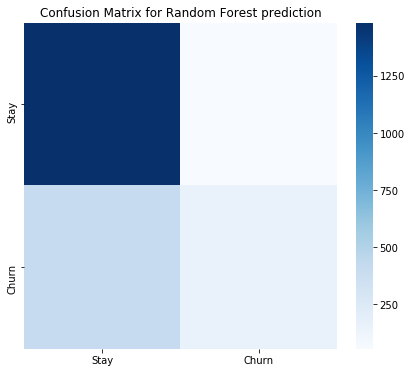

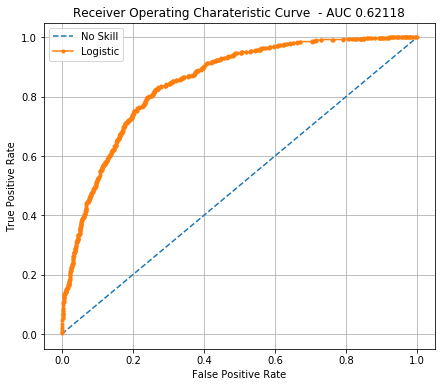

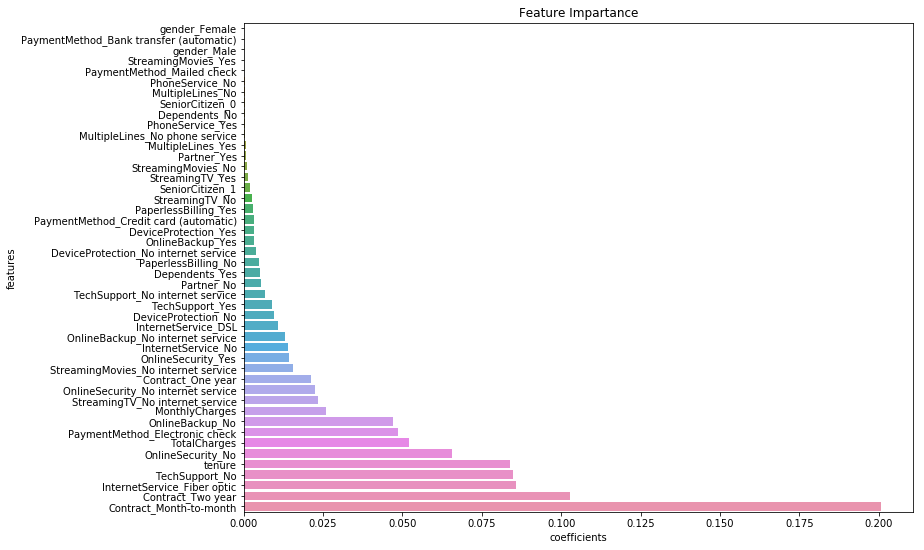

0.777567439659 0.621179190071


In [38]:
# Printing and ploting the metrics

column_df  = pd.DataFrame(Feature_columns)

coef_sumry    = pd.merge(coefficients,
                         column_df,
                         left_index= True,
                         right_index= True,
                         how = "left"
                        )

coef_sumry.columns = ["coefficients","features"]
coef_sumry         = coef_sumry.sort_values(by = "coefficients",
                                            ascending = False
                                           )
    
print (rfc)
print ("\nClassification report for Random Forest Ensamble: \n",
       classification_report(y_test,
                             predictions)
      )
print ("Accuracy   Score : ",accuracy_score(y_test,
                                            predictions)
      )

rfc_score = accuracy_score(y_test, predictions)

#confusion matrix
conf_matrix = confusion_matrix(y_test,
                               predictions
                              )
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,predictions)
print ("Area under curve : ",
       model_roc_auc,
       "\n"
      )

rfc_roc = roc_auc_score(y_test,predictions)

fpr,tpr,thresholds = roc_curve(y_test,
                               probabilities[:,1])


#plot confusion matrix
fig, ax = plt.subplots(figsize=(7,6))
trace1 = sns.heatmap(data = conf_matrix ,
                     xticklabels = ["Stay","Churn"],
                     yticklabels = ["Stay","Churn"],
                     cmap = "Blues"
                    )
plt.title('Confusion Matrix for Random Forest prediction');
plt.show()

# plot the ROC curve for the model
fig, ax = plt.subplots(figsize=(7,6))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(b=True)
plt.title('Receiver Operating Charateristic Curve  - AUC {:.5f}'.
           format(model_roc_auc)
          )
plt.legend()
plt.show()

# Feature Impartance
feature_impartant = coef_sumry.sort_values(by='coefficients')

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x=feature_impartant['coefficients'],
            y=feature_impartant['features'], 
            orient="V"
           )
plt.title('Feature Impartance')
plt.show()

print(rfc_score, rfc_roc)

###### Let us compare the models metrics

In [39]:
metric_df = pd.DataFrame([['LogReg', logit_score ,logit_roc],
                          ['LogREg_DUmmy', logit_dummy_score,logit_dummy_roc],
                          ['Random Forest', rfc_score, rfc_roc]
                         ],
                         columns=['Algorithm', 'Aqu_Score', 'ROC'])

metric_df.head()

,Algorithm,Aqu_Score,ROC
0,LogReg,0.805017,0.727960
1,LogREg_DUmmy,0.811169,0.737099
2,Random Forest,0.777567,0.621179


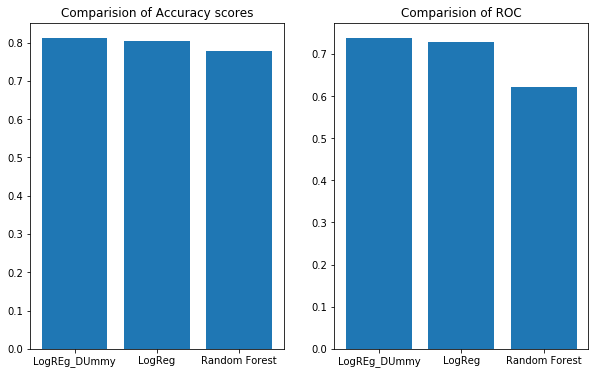

In [53]:
fix, (ax1, ax2)=plt.subplots(1,2, figsize=(10,6))

g = ax1.bar(x=metric_df['Algorithm'], height=metric_df['Aqu_Score'])
ax1.set_title('Comparision of Accuracy scores')

ax2.bar(x=metric_df['Algorithm'], height=metric_df['ROC'])
ax2.set_title('Comparision of ROC')
          
plt.show()         

###### WIth the limited analysis I have done the best algorithm to predict Churn is Logsitic Regression with Dummy Variable substition
###### The model also outputs the probabilty of a customer churn